# Ford Gobike Riders Data Feb 2019

# Investigation Overview

In this investigation, I wanted to look at the features of bike riders that could be used to predict their behaviour.           

The main focus was on the four Features: member gender, user type, duration in mintues & days of week.

# Dataset Overview

This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
#Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
#Read CSV file.
df = pd.read_csv('fordgobike_tripdata.csv')

# Bike Riders Member Gender Ratio

It seems that the propotion of male is represent the majority of bike riders with 74.6% is all men. while the the propotion of female of bike riders is only 23.3% and the other(unspecfic) propotion is 2.1%.



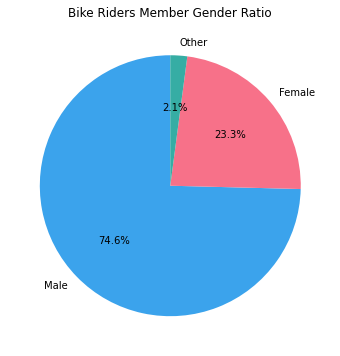

In [3]:
#Visualizing the bike riders based on member_gender.
member_gender_counts= df.member_gender.value_counts()
plt.figure(figsize=[8,6])
plt.pie(member_gender_counts,
        labels= member_gender_counts.index,
        startangle= 90, autopct='%1.1f%%',
        colors= [sb.color_palette('husl')[4],sb.color_palette('husl')[0],sb.color_palette('husl')[3]]);
plt.title('Bike Riders Member Gender Ratio');

# Bike Riders Based on User Type

Most of bike riders are members (Subscriber) with slightly above 160000 members, however 20000 of bike riders are non-members(Customers), and that is a huge difference.

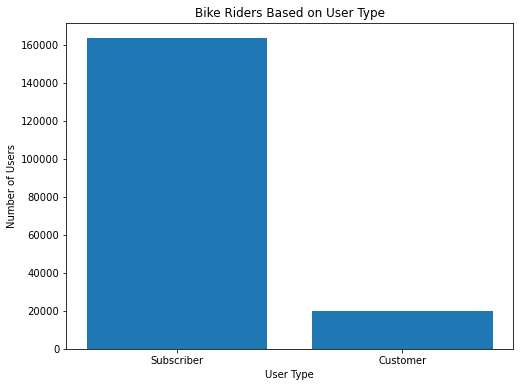

In [4]:
#Visualizing of bike riders based on user_type.
plt.figure(figsize=[8,6])
plt.bar(x = df.user_type.value_counts().keys(), height = df.user_type.value_counts())
plt.xlabel('User Type')
plt.ylabel('Number of Users')
plt.title('Bike Riders Based on User Type')
plt.show()

# Trip of Bike Riders Based on Duration

The most bike riders trip duration is 5 minutes, as the plot is right-skewed that means the trip duration becomes longer then the number of bike riders decreases

In [5]:
#duration in minutes.
df['duration_min'] = df['duration_sec']//60

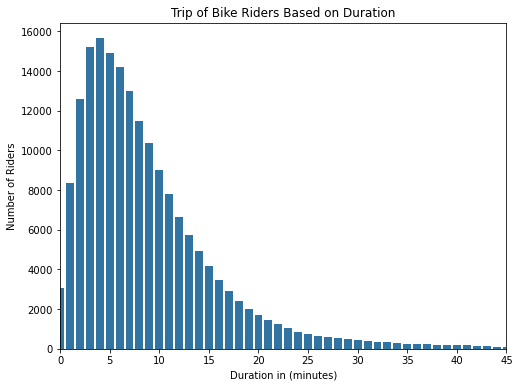

In [6]:
#Visualizing of bike riders based on user_type.
plt.figure(figsize=(8,6))
base_color= sb.color_palette()[0]
sb.countplot(data= df, x='duration_min', color = base_color)
plt.xlim((0,40))
plt.title('Trip of Bike Riders Based on Duration')
plt.ylabel('Number of Riders')
plt.xlabel('Duration in (minutes)')
plt.xticks([0,5,10,15,20,25,30,35,40,45],[0,5,10,15,20,25,30,35,40,45]);

# What the effect of member gender & user type on duration ?

It seems the female & other genders are who slightly spend more time in ride, while the men tend to spend time less than them, probably due that the highest propotion of members are men with 74.6% among all the other riders and thus they are may more used to ride than women.                                                                                             

In the other hand, it seems that the non-members(Customers) is more likely to spend more time in the ride than the members(Subscribers).

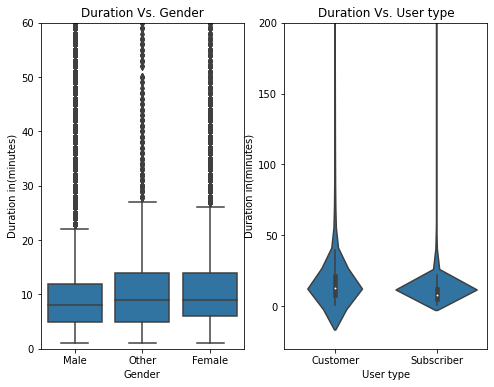

In [8]:
#Visualizing member_gender Vs. duration in minutes.
plt.figure(figsize = [8, 6])
plt.subplot(1, 2, 1)
sb.boxplot(data = df, x = 'member_gender', y = 'duration_min', color = base_color)
plt.ylim([0, 60])
plt.xlabel('Gender')
plt.ylabel('Duration in(minutes)')
plt.title('Duration Vs. Gender')
#Visualizing user type Vs. duration in minutes.
plt.subplot(1, 2, 2)
sb.violinplot(data = df, x = 'user_type', y = 'duration_min', color = base_color)
plt.ylim([-30, 200])
plt.xlabel('User type')
plt.ylabel('Duration in(minutes)')
plt.title('Duration Vs. User type')
plt.show()

# User type Vs. Days

Generally subscribers are more than the customers over the days, and specially in Thursdays we have above 30000 subscribed bike riders compared to other days.

In [10]:
#Create new columns for weekday/weekend & days.
df['start_time']= pd.to_datetime(df['start_time'])
df['day']= df['start_time'].dt.day_name()
day_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday', 'Saturday', 'Sunday'] 

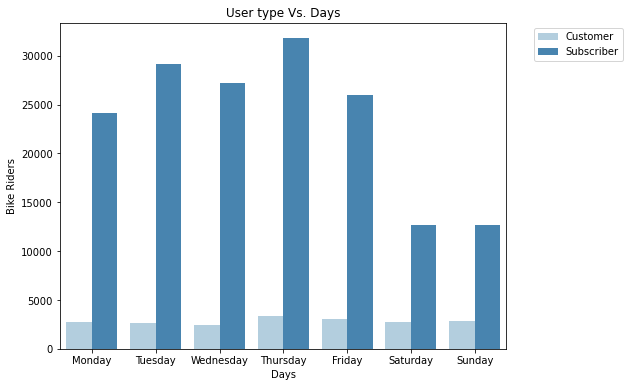

In [11]:
##Visualizing user_type Vs.days.
plt.figure(figsize= (8,6))
sb.countplot(data= df, hue='user_type', x= 'day', palette= 'Blues', order= day_order)
plt.xlabel('Days')
plt.ylabel('Bike Riders')
plt.title('User type Vs. Days')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2);

# Days Vs. Trip Duration

The median of duration is almost the same during all days.                                                                     

However, bike riders who ride at weekends tend to spend a a little more time on the trip than bike riders who riding on weekdays.

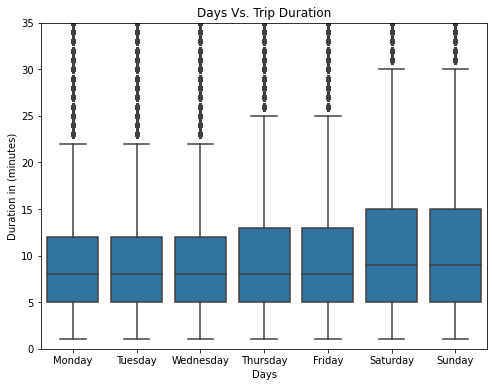

In [12]:
#Visualizing duration Vs.days.
plt.figure(figsize= (8,6))
sb.boxplot(data= df, x='day', y='duration_min', color= base_color, order= day_order)
plt.ylim(0,35)
plt.xlabel('Days')
plt.ylabel('Duration in (minutes)')
plt.title('Days Vs. Trip Duration');

# Trip duration based on bike riders ages and gender

As seen from the plots below : The most male bike riders ages are between 18 - 75 year old, while the female bike riders ages are 18-70 year old and the other bike rider ages are precarious but we can notice that most of them are between 20 - 55 yeaar old.

Generally, most bike riders are spend less than 200 minutes in their riding trip regargless their gender or age.

C:\Users\haya3\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


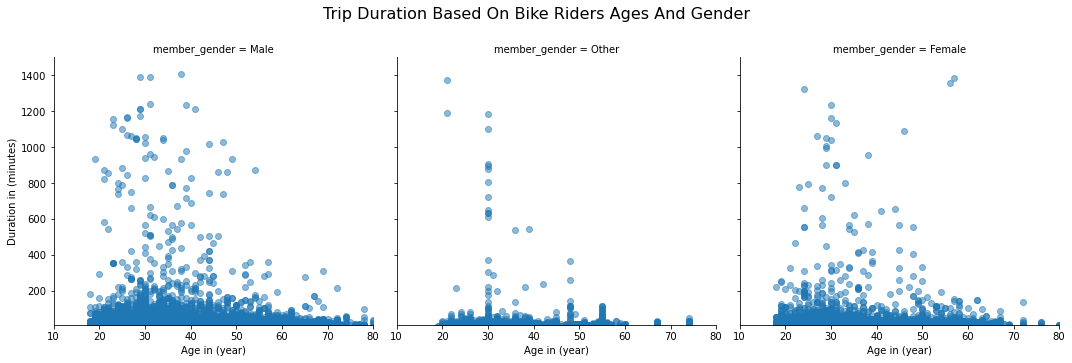

In [13]:
#Visualizing trip duration based bike riders ages.
df['age'] = (2019 - df['member_birth_year'])
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 3, size = 5,
                 xlim = [10, 80], ylim = [10, 1500])
gender.map(plt.scatter, 'age', 'duration_min', alpha=0.5)
gender.set_xlabels('Age in (year)')
gender.set_ylabels('Duration in (minutes)')
plt.suptitle('Trip duration based on bike riders ages and gender'.title(), y = 1,
            fontsize = 16)
plt.tight_layout();

# The duration of bike riders over days based on user type

From this plot below we can say : the non-members on weekends are more likely to spend time than subscribers or any other days.
Also, the trip time of members is almost consistent on weekdays.

C:\Users\haya3\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


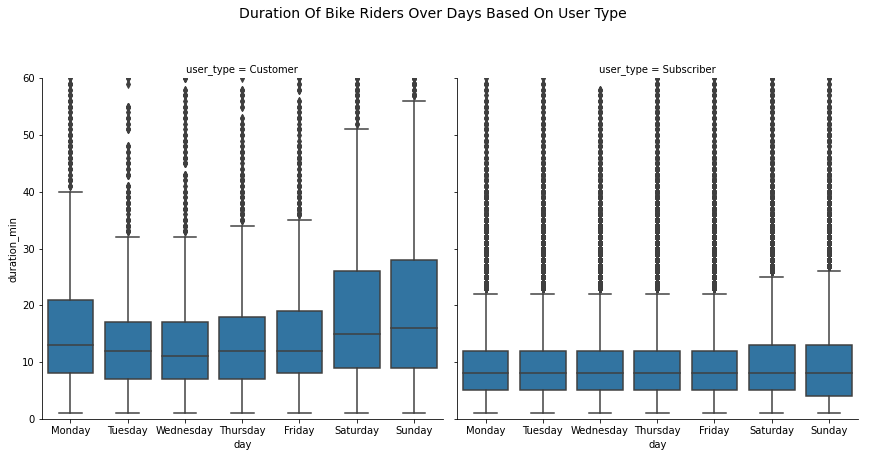

In [14]:
#Visualizing duration of bike riders over days based on user type.
g= sb.FacetGrid(data= df, col= 'user_type', size=6)
g.map(sb.boxplot, 'day', 'duration_min', order= day_order)
plt.ylim(0,60)
g.add_legend()
plt.suptitle('Duration of bike riders over days based on user type'.title(), y = 1.05,
            fontsize = 14)
plt.tight_layout()
gender.fig.set_size_inches(10, 8);

# Daily usage of the bikes based user type and gender.

The bikes' usages times during the weekdays is the same for subscribers & unsubscribers genders, however the ratio between unsubscribed males & females in the weekends is much higher than the subscribed males & females.

In fact, the unsubscribed females are quite more in comparison to subscribed femals.

While approximately we can see the same number of males whether they are subscribed or unsubscribed.

C:\Users\haya3\anaconda3\lib\site-packages\seaborn\categorical.py:3747: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1008x576 with 0 Axes>

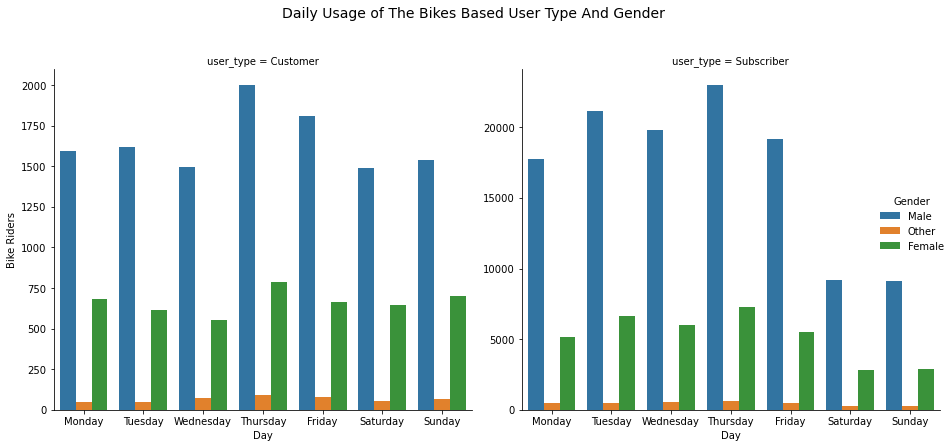

In [15]:
#Visualing daily usage of the bikes based user type and gender.
plt.figure(figsize= (14, 8))
g = sb.catplot(data=df, x='day', col='user_type', hue='member_gender', kind='count', order= day_order, size= 6, sharey = False)
g.set_axis_labels('Day', 'Bike Riders')
g._legend.set_title('Gender')
g.fig.suptitle('Daily Usage of The Bikes Based User Type And Gender', y=1.03, fontsize=14)
plt.tight_layout()
gender.fig.set_size_inches(14, 8);

In [ ]:
!jupyter nbconvert Explanatory_Analysis_Slide_Deck.ipynb --to slides --post serve --no-input --no-prompt